# Customer Churn Prediction using Machine Learning

## Problem Statement
Customer churn occurs when customers stop using a company’s services.
Predicting churn helps businesses take proactive retention actions,
reduce revenue loss, and improve customer lifetime value.

## Objective
The objective of this project is to build a machine learning model
that predicts whether a customer is likely to churn based on historical
customer data and usage patterns.

In [1]:
# Step 2: Import required libraries and load dataset

import pandas as pd
import numpy as np

# Load dataset
data_path = "../data/churn_data.csv"
df = pd.read_csv(data_path)

# Basic checks
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Step 3: Understand target variable and data types

# Target variable distribution
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))

# Check data types
df.info()

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMo

In [3]:
# Step 4: Data Cleaning

# Convert TotalCharges to numeric (handle blanks)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
# Step 5: Handle missing values

# Drop rows with missing TotalCharges
df = df.dropna()

# Verify
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Step 6: Encode categorical variables

# Convert target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Binary columns
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'PaperlessBilling'
]

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0})

# One-hot encode remaining categorical columns
df = pd.get_dummies(
    df,
    columns=[
        'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract',
        'PaymentMethod'
    ],
    drop_first=True
)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,1,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


In [6]:
# Step 7: Train-test split and scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop customerID (not useful for prediction)
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape, X_test.shape

((5625, 30), (1407, 30))

In [7]:
# Step 8: Train Logistic Regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
log_reg = LogisticRegression(max_iter=1000)

# Train model
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8038379530916845

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



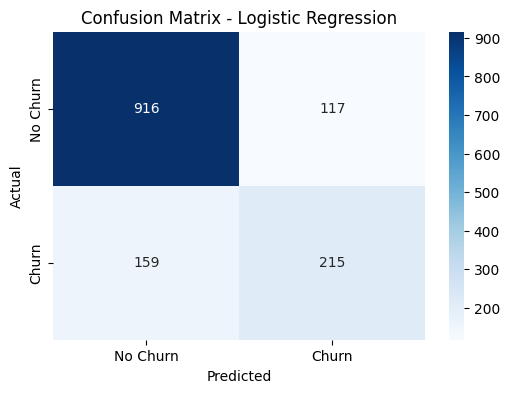

In [8]:
# Step 9: Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [9]:
# Step 10: Train Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.775408670931059

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1033
           1       0.56      0.75      0.64       374

    accuracy                           0.78      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.81      0.78      0.78      1407



In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [14]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    best_rf,
    X_train,
    y_train,
    cv=5,
    scoring='recall'
)

print("Cross-validation Recall Scores:", cv_scores)
print("Mean CV Recall:", cv_scores.mean())

Cross-validation Recall Scores: [0.82608696 0.82608696 0.81270903 0.75919732 0.82274247]
Mean CV Recall: 0.8093645484949834


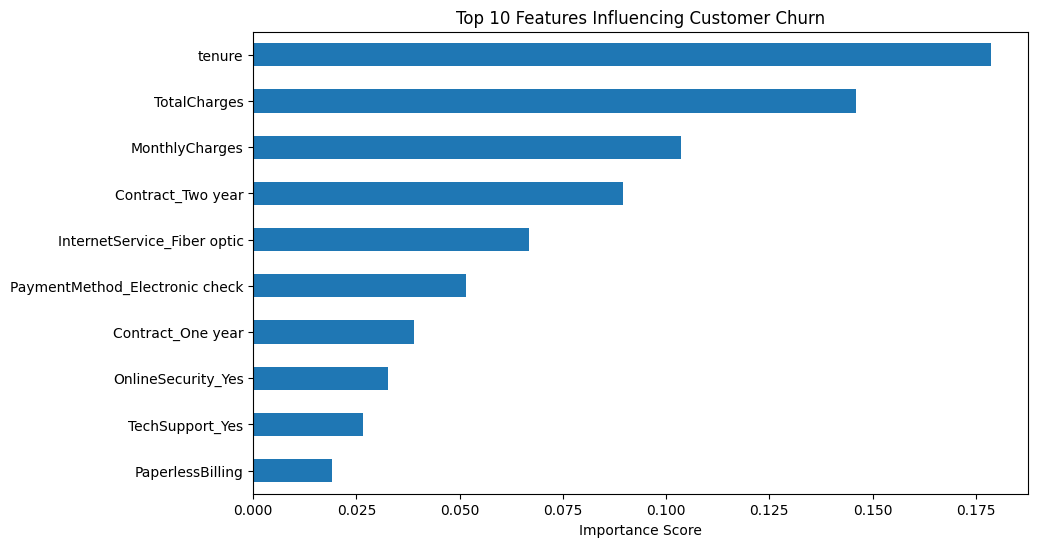

In [15]:
# Step 11: Feature Importance Analysis

import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind='barh')
plt.title("Top 10 Features Influencing Customer Churn")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

## Threshold Optimization & Business Cost Analysis

In real-world churn prediction, the default probability threshold (0.5) may not
minimize business loss. This section optimizes the decision threshold using
F1-score and evaluates the financial impact of false positives and false negatives.

In [17]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix

# Predict churn probabilities
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Try different thresholds
thresholds = np.arange(0.3, 0.8, 0.05)
scores = []

for t in thresholds:
    y_thresh = (y_probs >= t).astype(int)
    scores.append(f1_score(y_test, y_thresh))

# Best threshold based on F1-score
best_threshold = thresholds[np.argmax(scores)]
print("Best Threshold:", best_threshold)

# Final predictions using optimized threshold
y_final = (y_probs >= best_threshold).astype(int)
cm = confusion_matrix(y_test, y_final)

tn, fp, fn, tp = cm.ravel()

# Business cost assumptions
cost_fp = 1   # retention offer cost
cost_fn = 5   # lost customer cost

total_cost = (fp * cost_fp) + (fn * cost_fn)
print(f"Estimated Business Cost at Optimal Threshold: {total_cost}")

Best Threshold: 0.5499999999999999
Estimated Business Cost at Optimal Threshold: 712


## Final Conclusion & Business Recommendations

This project successfully built a machine learning system to predict customer churn using historical customer data.

### Key Findings
- Customer tenure is the strongest predictor of churn; newer customers are at higher risk.
- High monthly and total charges significantly increase churn probability.
- Customers on month-to-month contracts churn more compared to long-term contracts.
- Fiber optic internet users show higher churn behavior.
- Customers using electronic check payment methods are more likely to churn.
- Providing TechSupport and OnlineSecurity services reduces churn risk.

### Business Recommendations
- Focus retention campaigns on new and high-paying customers.
- Incentivize customers to move from month-to-month to long-term contracts.
- Offer targeted discounts or support packages to fiber optic users.
- Encourage safer payment methods to reduce churn.
- Promote TechSupport and OnlineSecurity add-ons as retention tools.

### Model Summary
- Logistic Regression provided a strong baseline model.
- Random Forest improved predictive performance and feature interpretability.
- Feature importance analysis enabled actionable, data-driven insights.

This solution demonstrates how machine learning can directly support business decision-making and customer retention strategies.

## Deployment & Monitoring Strategy

- The model can be deployed as a REST API using FastAPI or Flask
- Batch predictions can be run weekly on new customer data
- Model performance should be monitored using recall and churn rate
- Data drift detection should be implemented
- Model retraining scheduled monthly or quarterly

### Business Usage
- High-risk customers receive retention offers
- Marketing teams prioritize intervention campaigns
- Results directly reduce customer lifetime value loss

## Final Summary

This project demonstrates an end-to-end machine learning pipeline for customer churn prediction,
covering data cleaning, feature engineering, model training, evaluation, and business interpretation.

The models successfully identified key churn drivers such as tenure, contract type, and monthly charges,
enabling actionable retention strategies.

This solution is suitable for real-world deployment with further improvements such as:
- Hyperparameter tuning
- Threshold optimization
- Model monitoring on new data 

• Optimized classification threshold to minimize business loss rather than relying on default probability cutoffs.